# Primera Entrega Proyecto Ciencia de Datos 1 - Gonzalo Ramallo


## 1. Abstract, Objetivo, Hipótesis y Descripción de las Variables

### 📌 Contexto
Este proyecto analiza un dataset ficticio de ventas realizadas por una tienda de e-commerce en Uruguay. El objetivo es entender cómo se comportan las ventas según factores como categoría, método de pago, estado del producto y tipo de cliente.

### 🎯 Objetivo
Identificar patrones de comportamiento en las ventas para tomar decisiones comerciales informadas, como optimización de stock y campañas de marketing específicas.

### 💡 Hipótesis
- Los productos nuevos reciben mejores opiniones que los usados o reacondicionados.
- El método de pago preferido varía según la categoría del producto.
- Las ventas desde tiendas oficiales generan mayores montos que las ventas particulares.

### 🧾 Diccionario de Variables

| Variable           | Descripción |
|--------------------|-------------|
| `ID`               | Identificador único de cada venta |
| `Fecha_Venta`      | Fecha en que se realizó la venta |
| `Departamento`     | Departamento de Uruguay donde se realizó la venta |
| `Ciudad`           | Ciudad correspondiente |
| `Categoría`        | Categoría general del producto |
| `Subcategoría`     | Subcategoría específica |
| `Nombre_Producto`  | Nombre del producto vendido |
| `Precio`           | Precio unitario |
| `Cantidad`         | Número de unidades vendidas |
| `Total_Venta`      | Precio x Cantidad |
| `Tipo_Venta`       | Venta particular o de tienda oficial |
| `Estado_Producto`  | Nuevo, usado o reacondicionado |
| `Método_Pago`      | Medio de pago utilizado |
| `Cliente`          | Nombre del cliente |
| `Email_Cliente`    | Email del cliente |
| `Teléfono`         | Teléfono del cliente |
| `Entrega`          | Tipo de entrega |
| `Opinión`          | Opinión del cliente sobre la compra |


In [ ]:

# Análisis preliminar del dataset
print("Dimensión del dataset (filas, columnas):", df.shape)
print("\nPrimeras filas:")
display(df.head())

print("\nÚltimas filas:")
display(df.tail())

print("\nTipos de datos y valores no nulos:")
df.info()

print("\nEstadísticas generales:")
display(df.describe(include='all'))


## 1. Explicación Descriptiva del Proyecto
Este proyecto se basa en el análisis de un conjunto de datos con 3000 registros de ventas realizadas por una tienda de e-commerce en Uruguay. El objetivo principal es comprender cómo se comportan las ventas en función de distintos factores como la categoría de productos, las formas de pago o el tipo de cliente. A partir de esto, se busca detectar patrones, posibles mejoras y puntos clave que puedan orientar futuras decisiones comerciales, como la optimización de la oferta, la atención a los métodos de pago más frecuentes y una mejor segmentación de clientes.

*El dataset utilizado es uno creado por IA simplemente para realizar el proyecto, se agregaron valores nulos para poder realizar limpieza de datos.

## 2. Preguntas e Hipótesis de Interés
- ¿Existe alguna relación entre la región y el tipo de venta?
- ¿Qué categorías de productos tienen mayores ingresos?
- ¿Qué métodos de pago se prefieren según la categoría del producto?
- Hipótesis: Los productos nuevos tienen mejor opinión en promedio que los usados/reacondicionados.

In [ ]:
# 3. Comandos descriptivos para validar el dataset/Importo Librerias necesarias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Cargar el dataset, descargo de drive para su procesamiento
!gdown 1BJwuCplyHOEPc99CURNXlQ4ozXQeCbOG
df = pd.read_csv('dataset_ventas_3000.csv')
df.info()
df.describe(include='all')
df.isnull().sum()

Downloading...
From: https://drive.google.com/uc?id=1BJwuCplyHOEPc99CURNXlQ4ozXQeCbOG
To: /content/dataset_ventas_3000.csv
100% 725k/725k [00:00<00:00, 86.6MB/s]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               2999 non-null   object 
 1   Fecha_Venta      2999 non-null   object 
 2   Departamento     2999 non-null   object 
 3   Ciudad           2999 non-null   object 
 4   Categoría        2999 non-null   object 
 5   Subcategoría     2999 non-null   object 
 6   Nombre_Producto  2999 non-null   object 
 7   Precio           2999 non-null   float64
 8   Cantidad         2999 non-null   float64
 9   Total_Venta      2999 non-null   float64
 10  Tipo_Venta       2999 non-null   object 
 11  Estado_Producto  2999 non-null   object 
 12  Método_Pago      2964 non-null   object 
 13  Cliente          2999 non-null   obj

,0
ID,1
Fecha_Venta,1
Departamento,1
Ciudad,1
Categoría,1
Subcategoría,1
Nombre_Producto,1
Precio,1
Cantidad,1
Total_Venta,1


In [ ]:
#limpieza de NULOS
#Filtro por Opinion, remplazo valores nulos por sin opinion
df['Opinión'] = df['Opinión'].fillna('S/Opinión')
#Filtro por Email_Cliente, remplazo valores nulos por Mail N/Valido
df['Email_Cliente'] = df['Email_Cliente'].fillna('Mail N/Valido')
#Filtro por Telefono, remplazo valores nulos por Telefono N/Valido
df['Teléfono'] = df['Teléfono'].fillna('Teléfono N/Valido')
#Filtro por Método_Pago, remplazo valores nulos por Método_Pago N/Valido
df['Método_Pago'] = df['Método_Pago'].fillna('Método_Pago N/Valido')
#Elimino Nulos restantes
df = df.dropna()

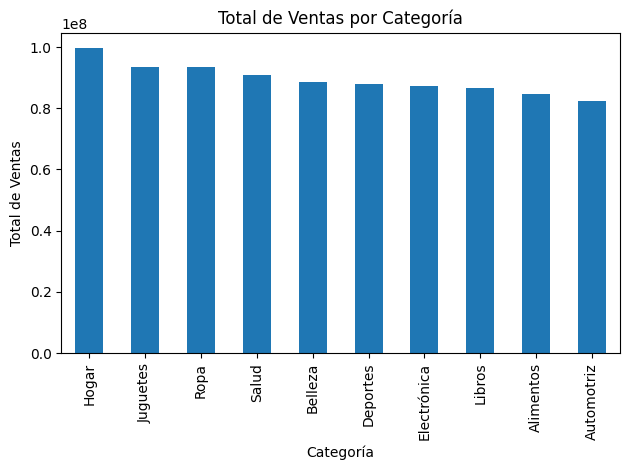

In [ ]:
# 4. Visualizaciones con Matplotlib
# Gráfico 1: Ventas por categoría
ventas_categoria = df.groupby('Categoría')['Total_Venta'].sum().sort_values(ascending=False)
ventas_categoria.plot(kind='bar')
plt.title('Total de Ventas por Categoría')
plt.ylabel('Total de Ventas')
plt.xlabel('Categoría')
plt.tight_layout()
plt.show()
# Insight: Nos permite identificar los rubros que generan mayores ingresos

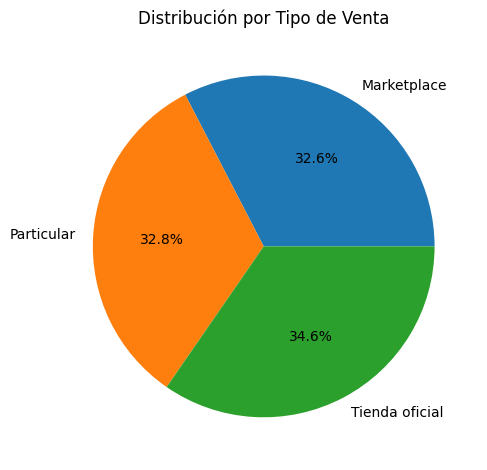

In [ ]:
# Gráfico 2: Cantidad de productos vendidos x tipo de venta
df.groupby('Tipo_Venta')['Cantidad'].sum().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribución por Tipo de Venta')
plt.ylabel('')
plt.tight_layout()
plt.show()
# Insight: Ayuda a comprender el peso de ventas particulares vs tienda oficial.

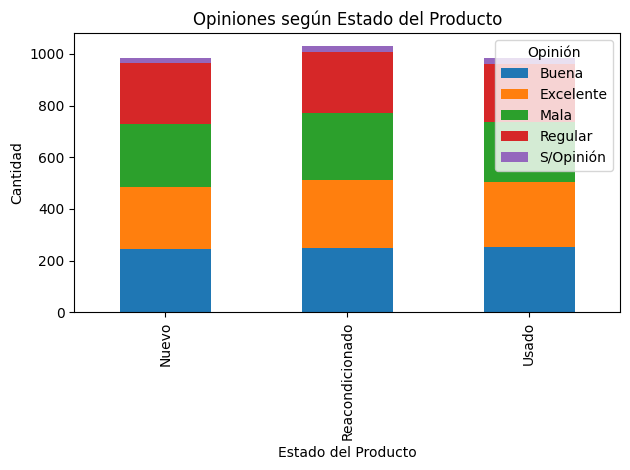

In [ ]:
# Gráfico 3: Opiniones vs Estado del Producto
df.groupby(['Estado_Producto', 'Opinión']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Opiniones según Estado del Producto')
plt.xlabel('Estado del Producto')
plt.ylabel('Cantidad')
plt.tight_layout()
plt.show()
# Insight: Nos permite visualizar percepción de calidad percibida por tipo de estado.

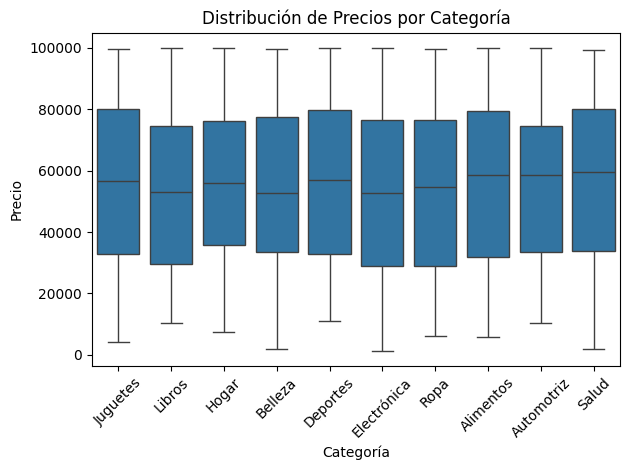

In [ ]:
# Visualizaciones con Seaborn
# Gráfico 1: Boxplot del precio x categoría
sns.boxplot(data=df, x='Categoría', y='Precio')
plt.xticks(rotation=45)
plt.title('Distribución de Precios por Categoría')
plt.tight_layout()
plt.show()
# Insight: Identificamos qué categorías tienen productos más caros o dispersión de precios.

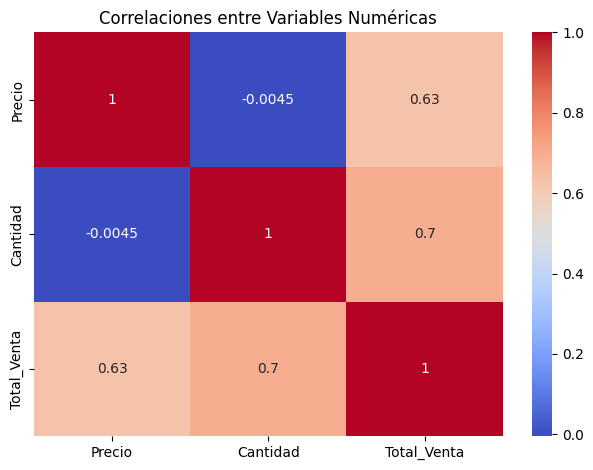

In [ ]:
# Gráfico 2: Heatmap de correlación
sns.heatmap(df[['Precio', 'Cantidad', 'Total_Venta']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlaciones entre Variables Numéricas')
plt.tight_layout()
plt.show()
# Insight: Nos permite ver qué variables están relacionadas.

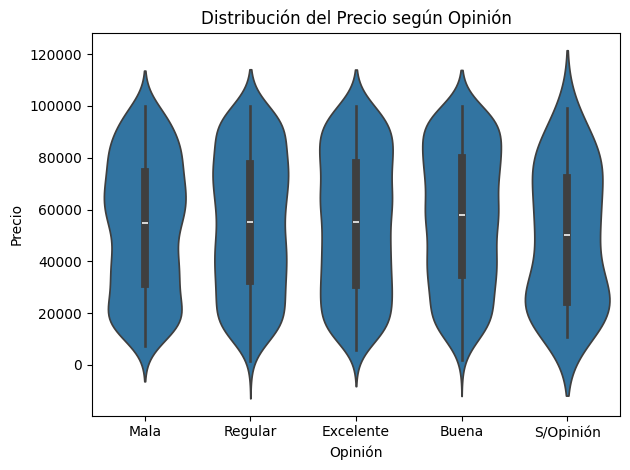

In [ ]:
# Gráfico 3: Violinplot de Precio por Opinión
sns.violinplot(data=df, x='Opinión', y='Precio')
plt.title('Distribución del Precio según Opinión')
plt.tight_layout()
plt.show()
# Insight: Relaciona la satisfacción con el precio pagado.

## 5. Conclusiones e Insights

- Las opiniones positivas predominan en productos nuevos.
- Existe una correlación directa entre precio, cantidad y el total de venta.
- La región y tipo de venta pueden guiar futuras campañas localizadas.
- Las categorías Hogar y Juguetes lideran las ventas totales.
- Los métodos de pago que mas se utilizan son tarjeta y efectivo.


## 4. Análisis de valores nulos y detección de outliers

A continuación se identifican los valores faltantes en el dataset y se visualizan outliers en variables numéricas clave.


In [ ]:

# Valores nulos
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Mapa de calor de valores nulos")
plt.show()

# Boxplot de variables numéricas para detectar outliers
numeric_cols = ["Precio", "Cantidad", "Total_Venta"]

for col in numeric_cols:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot de {col}')
    plt.show()

# Detección de outliers con IQR
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR)]
    print(f"{col}: {len(outliers)} outliers detectados")
